In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
# Read data
myopia_df = pd.read_csv("myopia.csv")
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [20]:
# Drop "MYOPIC" column from the dataset 
X = myopia_df.drop('MYOPIC', axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [21]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
myopia_scaled = StandardScaler().fit_transform(X)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [41]:
## Apply Dimensionality Reduction with PCA

# Initialize PCA model
pca = PCA(n_components=0.99)

# Using PCA(n_components=0.99) creates a model that will preserve approximately
# 99% of the explained variance, whether that means reducing the dataset to 80 
# principal components or 3. For this assignment, preserve 90% of the explained 
# variance in dimensionality reduction.

# NEED MORE THAN 2 COMPONENTS
myopia_pca = pca.fit_transform(myopia_scaled)
myopia_pca.shape

(618, 12)

In [29]:
# Transform PCA data to a DataFrame
# df_myopia_pca = pd.DataFrame(
#     data=myopia_pca, columns=["principal component 1", "principal component 2"], index=myopia_df.index
# )
# df_myopia_pca.head()

,principal component 1,principal component 2
0,0.535503,1.145004
1,-0.624706,-1.575786
2,-0.933479,-0.717076
3,0.106354,1.192475
4,-0.388503,-2.839655


In [42]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

In [43]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(df_myopia_pca)

/Users/daniellesears/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/daniellesears/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


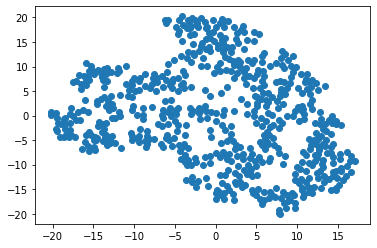

In [44]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [ ]:
## Perform a Cluster Analysis with K-means

In [45]:
# Initializing model with K = 3 (how many clusters based on the data?)
model = KMeans(n_clusters=3, random_state=5)

In [46]:
# Fitting model
model.fit(myopia_df)

KMeans(n_clusters=3, random_state=5)

In [47]:
# Get predictions
predictions = model.predict(myopia_df)
print(predictions)

[0 1 1 0 1 0 0 1 1 0 2 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 1 1 1 1 2 0 0 1 2 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 2 0 1 1 0 1 2 1 2 0
 1 0 1 2 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 2 0 1 0 0 0 1 0 0 2 0 1 0 1 1 2
 1 1 1 1 1 0 1 1 0 1 0 1 1 2 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0
 1 2 1 1 2 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 2 1 1 0 2 1 1 1 1 1 0 1 0 2 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 2 1 0 0 1 0 2 1 1 0 1 0
 2 1 1 2 2 1 0 1 0 2 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 2 1 0 0 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 2 0 1 2 0 2 1 1 1 0 1 0 1 1 0 1 2 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 2 0 0 0 0 0 2 1 1 1 1 0 1 0 0 0 1 2 1 1 1 0 1 0 1 1 0 1 0 2 0 0 0
 2 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 2 1 1 0 0 0 2 1 1 0 1 0 1 2 0 2 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 2 1 1 0 1 0 1 2 1 1 2 1 1 1 1 0 1
 1 1 2 1 1 1 0 1 2 0 1 1 

In [48]:
# Add a new class column to df_iris
myopia_df["class"] = model.labels_
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,0
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,1
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,0
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,1


In [ ]:
## Finding the best value for k using the Elbow Curve

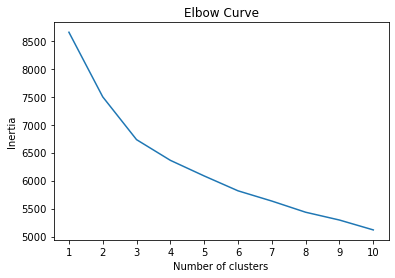

In [49]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
# plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
## Findings
The results could not be clustered. I would recommend 